In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<Axes: xlabel='count', ylabel='domain'>

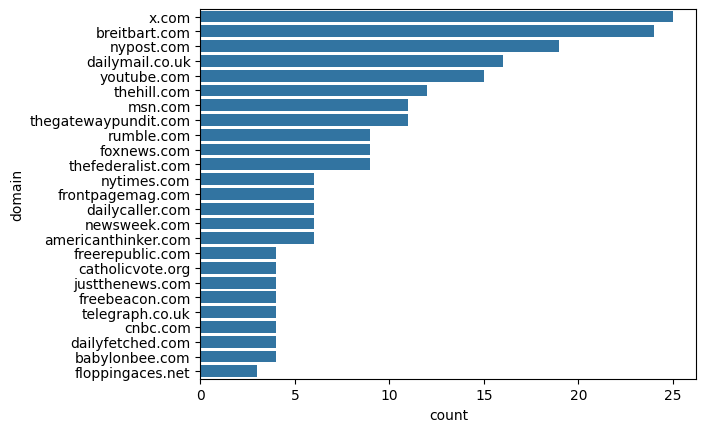

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<Axes: xlabel='count', ylabel='posted_by'>

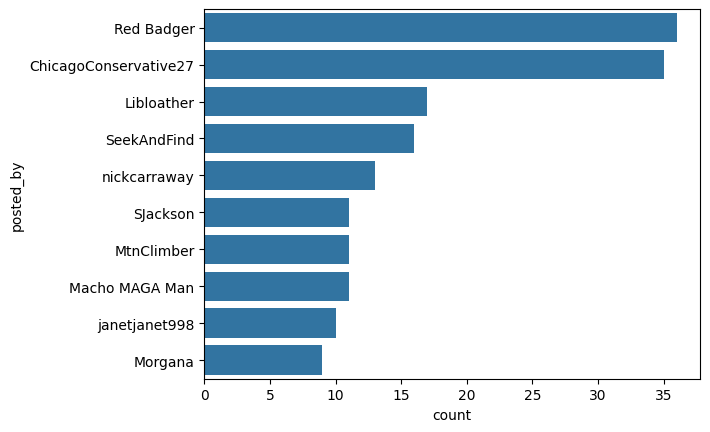

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

/tmp/ipykernel_179241/2178239382.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["domain", "posted_by"])


domain         \
                                            count unique   
domain               posted_by                             
americanthinker.com  MtnClimber                 4      1   
                     SeekAndFind                2      1   
breitbart.com        ChicagoConservative27     19      1   
                     Red Badger                 1      1   
catholicvote.org     Morgana                    4      1   
dailycaller.com      MtnClimber                 1      1   
                     Red Badger                 1      1   
                     Libloather                 2      1   
dailyfetched.com     Red Badger                 2      1   
dailymail.co.uk      Morgana                    1      1   
                     Libloather                 6      1   
floppingaces.net     Red Badger                 1      1   
foxnews.com          ChicagoConservative27      1      1   
                     SJackson                   2      1   
frontpagemag.com     Red Badger                 1      1   
                     SJackson                   4      1   
justthenews.com      MtnClimber                 2      1   
newsweek.com         nickcarraway               2      1   
nypost.com           ChicagoConservative27      7      1   
                     Libloather                 3      1   
                     SJackson                   1      1   
                     nickcarraway               4      1   
rumble.com           janetjanet998              2      1   
thefederalist.com    SeekAndFind                4      1   
thegatewaypundit.com Red Badger                 6      1   
                     Macho MAGA Man             5      1   
thehill.com          ChicagoConservative27      5      1   
                     Libloather                 5      1   
x.com                Red Badger                 4      1   
                     janetjanet998              7      1   
                     Macho MAGA Man             5      1   
youtube.com          Morgana                    1      1   

                                                                       
                                                             top freq  
domain               posted_by                                         
americanthinker.com  MtnClimber              americanthinker.com    4  
                     SeekAndFind             americanthinker.com    2  
breitbart.com        ChicagoConservative27         breitbart.com   19  
                     Red Badger                    breitbart.com    1  
catholicvote.org     Morgana                    catholicvote.org    4  
dailycaller.com      MtnClimber                  dailycaller.com    1  
                     Red Badger                  dailycaller.com    1  
                     Libloather                  dailycaller.com    2  
dailyfetched.com     Red Badger                 dailyfetched.com    2  
dailymail.co.uk      Morgana                     dailymail.co.uk    1  
                     Libloather                  dailymail.co.uk    6  
floppingaces.net     Red Badger                 floppingaces.net    1  
foxnews.com          ChicagoConservative27           foxnews.com    1  
                     SJackson                        foxnews.com    2  
frontpagemag.com     Red Badger                 frontpagemag.com    1  
                     SJackson                   frontpagemag.com    4  
justthenews.com      MtnClimber                  justthenews.com    2  
newsweek.com         nickcarraway                   newsweek.com    2  
nypost.com           ChicagoConservative27            nypost.com    7  
                     Libloather                       nypost.com    3  
                     SJackson                         nypost.com    1  
                     nickcarraway                     nypost.com    4  
rumble.com           janetjanet998                    rumble.com    2  
thefederalist.com    SeekAndFind               thefederalist.com    4 

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

/tmp/ipykernel_179241/1921096508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby('title').


,timestamp,replies
title,,
Biden to address Supreme Court’s Trump immunity ruling in White House remarks [LIVE 7:45 PM ET],2024-07-02 00:50:21,184.0
